In [22]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt

In [23]:
M = 1               #"big" particle mass
m = 0.0001           #mediating particle mass
#c = 1              #speed of mediating particle
ro = 1              #initial separation
vo = 0              #initial speed (of massive particles)

N = 50              #number of collisions to track
                    #WARNING: only finite number actually occur
                    #so this will break down if N chosen too large

In [24]:
t = np.zeros(N)     #times collision cycles begin
v = np.zeros(N)     #particle speeds at start of collision cycle
r = np.zeros(N)     #spatial separation at start of collision cycle 
c = np.zeros(N)

r[0] = ro           #set initial values in arrays
v[0] = vo
t[0] = 0
c[0] = 1

In [25]:
i = 0
while i<N-1:
    c[i+1] = ((-2*M)/(M+m))*v[i] + ((M-m)/(M+m))*c[i]
    v[i+1] = ((M-m)/(M+m))*v[i] + (2*m/(M+m))*c[i]
    t[i+1] = t[i] + r[i]/(2*(c[i]-v[i]))*(1+(c[i]/c[i+1]))
    r[i+1] = r[i] + (v[i]*r[i]/(c[i]-v[i]))+(c[i]/c[i+1])*(r[i]*v[i+1]/(c[i]-v[i]))
    
    
    i=i+1

In [26]:
#Acceleration obtained by finite-difference
a = (v[1:N]-v[0:N-1])/(t[1:N]-t[0:N-1])

#Acceleration applies to "midpoint" so to plot vs r we need the r
#values mid-collision cycle
ra = r[0:N-1] + 0.5*(r[1:N]-r[0:N-1])

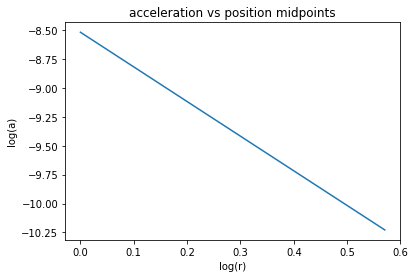

In [28]:
plt.plot(np.log(ra),np.log(a))
plt.xlabel('log(r)')
plt.ylabel('log(a)')
plt.title('acceleration vs position midpoints')
plt.show()


In [21]:
#linear curve fit p[0] is slope, p[1] is y-int
p = np.polyfit(np.log(ra),np.log(a),1)
print(p[0])

-2.999323116169414
